In [39]:
import pandas as pd
import numpy as np

In [40]:
path = 'E:/my_courses/data mining/project/data_genre/'
path = "C:/Users/User/Downloads/test2/"

In [41]:
book = pd.read_csv(path + 'book_no_null.csv')
rating = pd.read_csv(path + 'ratings.csv')
to_read = pd.read_csv(path + 'to_read.csv')

# 3️⃣ EDA Phase : Section 1
<hr style="border:2px solid gray"> </hr>

## 📑 Overlay rating based on independent variables

In [4]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9924 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  10000 non-null  float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              10000 non-null  object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

### ✅ Checking correlation between rating and original_publication_year

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
در این قسمت رابطه میان متغیر خروجی rating و سال چاپ کتاب ارزیابی شده است. ابتدا سال چاپ در 5 دسته سبدبندی شده و بنابر نمودار های رسم شده به نظر می رسد توزیع rating در کتاب های تمامی سبد ها بسیار بهم نزدیک است و در تمام سبد ها قریب به 60 درصد از کل امتیاز های داده شده 4 و 5 بوده اند. البته اگر دقیقتر نگاه شود میزان امتیاز ماکسیمم در سبد های 2 و 4 و 5 بیشتر از سبد های 1 و 3 بوده و کتاب های این سبد ها حدودا 5 درصد بیشتر از دو سبد دیگر ماکسیمم امتیاز را از کاربران دریافت کرده اند. به علاوه به نظر میرسد امتیاز 3 در کتاب های دو سبد 1 و 3 بیش از سبد های دیگر است به عبارتی امتیاز متوسط بیشتر به کتاب های موجود در این دو سبد داده شده است. امتیازات 1 و 2 که امتیازات پایین محسوب می شوند نیز در دو سبد 1 و 3 اندکی بیشتر از سبد های دیگر داده شده است. به طور کلی میتوان گفت  سبد 2 و 4 و 5 درصد بیشتری امتیاز بالا (امتیازات 5 و 4) دریافت کرده اند و لذا به نظر میرسد کتاب های مربوط به سال 1729 تا 2017 و همچنین 300 سال پیش از میلاد تا سال 800 میلادی نسبت به سایر کتاب ها تاحدودی امتیازات بالاتری دریافت کرده اند.

In [5]:
import jenkspy
breaks = jenkspy.jenks_breaks(book['original_publication_year'], nb_class=5)
print(breaks)
book['original_publication_year_jenks'] = pd.cut(book['original_publication_year'], bins=breaks, labels=['bin_1', 'bin_2', 'bin_3', 'bin_4', 'bin_5'])

[-1750.0, -300.0, 800.0, 1729.0, 1956.0, 2017.0]


In [6]:
book_rating = pd.merge(book, rating, how='left', on=['book_id'])

<AxesSubplot:xlabel='original_publication_year_jenks'>

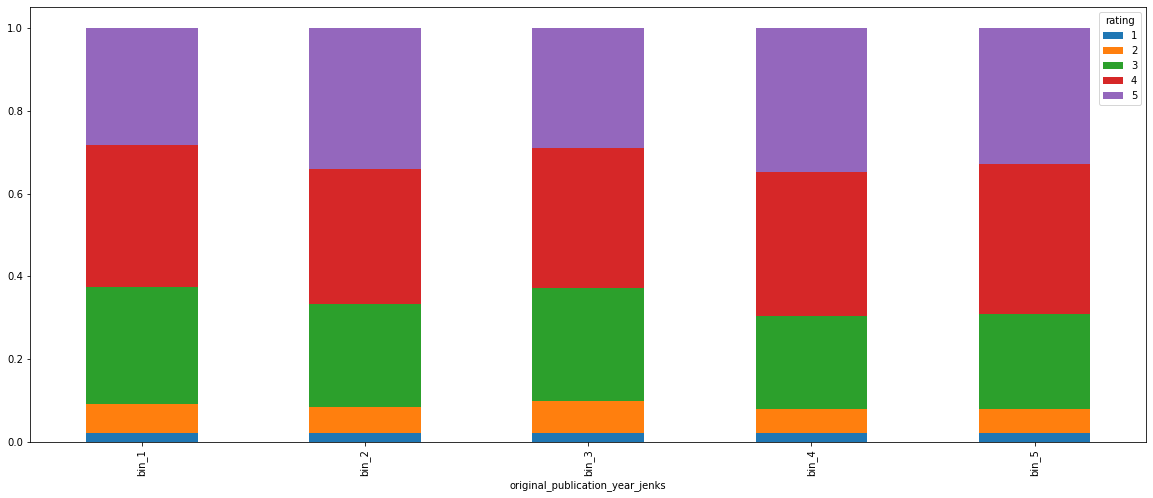

In [7]:
crosstab_01 = pd.crosstab(book_rating['original_publication_year_jenks'], book_rating['rating'])

crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind = 'bar', stacked = True, figsize = (20, 8))

In [8]:
del book_rating

### ✅ Checking correlation between rating and work_text_reviews_count

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
در این قسمت رابطه میان متغیر خروجی rating و تعداد review های کتاب ارزیابی شده است. ابتدا سال چاپ در 5 دسته سبدبندی شده و بنابر نمودار های رسم شده به نظر می رسد کتاب های دسته 5 امتیازات بالاتری نسبت به دسته های دیگر کسب کرده اند و هم ماکسیمم امتیاز و هم جمع امتیازات  4 و 5 که امتیازات بالا محسوب می شوند در این دسته درصد بیشتری نسبت به دسته های دیگر داشته است. اگر چه 4 دسته اول بسیار بهم نزدیک هستند اما با اندکی دقت متوجه میشویم کتاب های دو دسته 1 و 2 امتیاز 5 را نسبت به سایر دسته ها کمتر کسب کرده اند و امتیازات 1 تا 3 را بیشتر از سایر دسته ها داشته اند و لذا میتوان تاحدودی نتیجه گیری کرد که تعداد review بالای کتاب های میتواند به بهتر شدن امتیازات آن ها منجر شود همانطور که مشخص است امتیازات سبد 5 اندکی بهتر از امتیازات دو سبد 3 و 4 و امتیازات سبد 3 و 4 اندکی بهتر از امتیازات دو سبد 1 و 2 بوده است.

In [9]:
import jenkspy
breaks = jenkspy.jenks_breaks(book['work_text_reviews_count'], nb_class=5)
print(breaks)
book['work_text_reviews_count_jenks'] = pd.cut(book['work_text_reviews_count'], bins=breaks, labels=['bin_1', 'bin_2', 'bin_3', 'bin_4','bin_5'])

[3.0, 3960.0, 12663.0, 31423.0, 62543.0, 155254.0]


In [10]:
book_rating = pd.merge(book, rating, how='left', on=['book_id'])

<AxesSubplot:xlabel='work_text_reviews_count_jenks'>

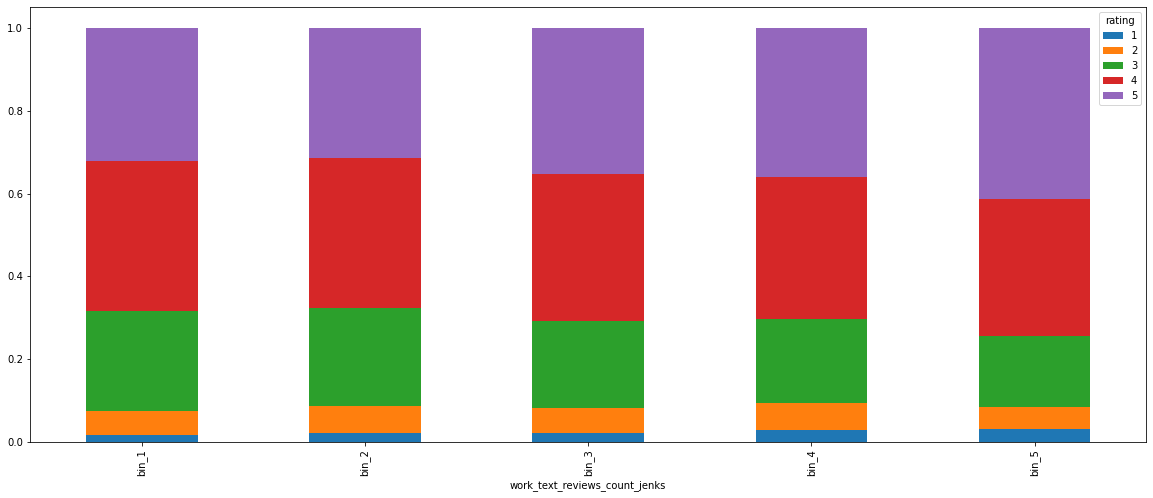

In [11]:
crosstab_01 = pd.crosstab(book_rating['work_text_reviews_count_jenks'], book_rating['rating'])

crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind = 'bar', stacked = True, figsize = (20, 8))

In [12]:
del book_rating

### ✅ Checking correlation between rating and language_code

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
در این قسمت رابطه میان متغیر خروجی rating و زبان کتاب ارزیابی شده است. همانطور که از نمودار ها مشخص است بیشترین امتیازات بالا یعنی امتیازات 4 و 5 را کتاب های به زبان Filipino و multi-languages دریافت کرده اند. و همچنین بیشترین درصد امتیاز پایین و متوسط یعنی امتیازات 1 و 2 و 3 را کتاب های به زبان  Portuguese و Romanian و Vietnamese دریافت کرده اند.

In [14]:
book_rating = pd.merge(book, rating, how='left', on=['book_id'])

<AxesSubplot:xlabel='language_code'>

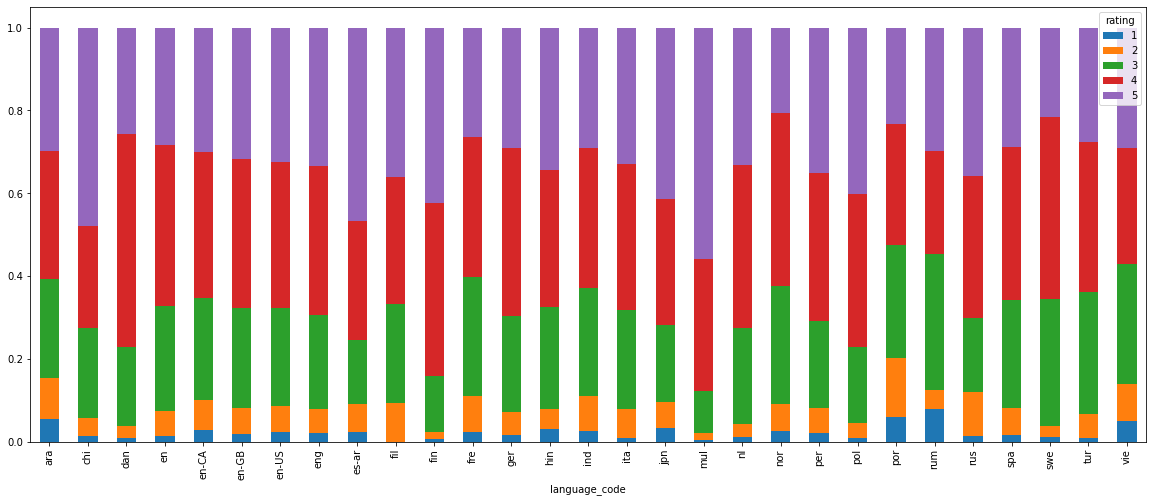

In [15]:
crosstab_01 = pd.crosstab(book_rating['language_code'], book_rating['rating'])

crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind = 'bar', stacked = True, figsize = (20, 8))

In [16]:
del book_rating

### ✅ Checking correlation between rating and books_count

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
در این قسمت رابطه میان متغیر خروجی rating و تعداد نسخه های کتاب ارزیابی شده است. همانطور که از نمودار ها مشخص است دسته 3 نسبت به دسته های دیگر اندکی امتیازات بالاتری کسب کرده است یعنی تعداد نسخه بین 317 الی 749. اما به طور کلی رابطه چندانی میان تعداد نسخه های یک کتاب و متغیر خروجی یعنی rating نمی باشد.

In [17]:
import jenkspy
breaks = jenkspy.jenks_breaks(book['books_count'], nb_class=5)
print(breaks)
book['books_count_jenks'] = pd.cut(book['books_count'], bins=breaks, labels=['bin_1', 'bin_2', 'bin_3', 'bin_4', 'bin_5'])

[1.0, 94.0, 317.0, 749.0, 1492.0, 3455.0]


In [18]:
book_rating = pd.merge(book, rating, how='left', on=['book_id'])

<AxesSubplot:xlabel='books_count_jenks'>

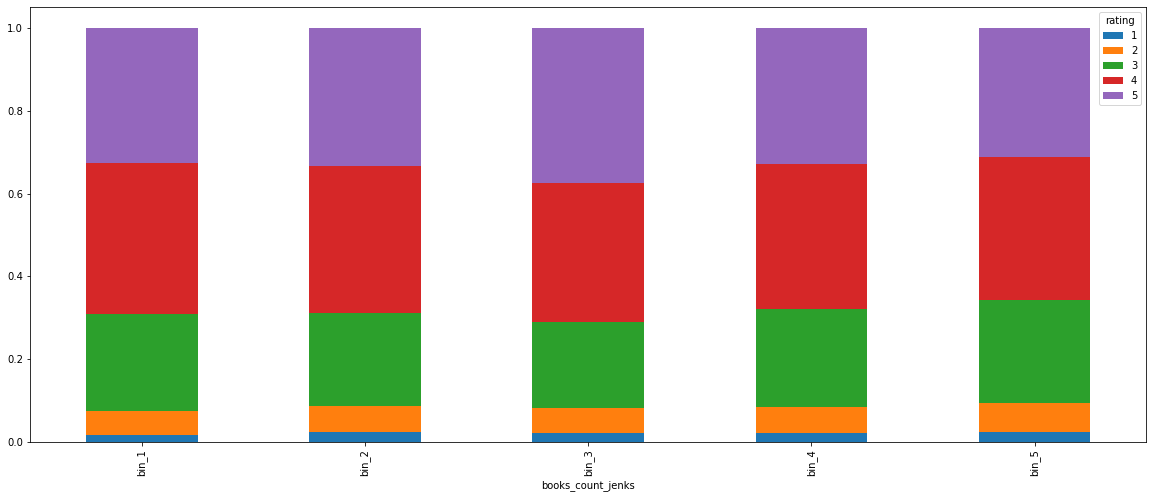

In [19]:
crosstab_01 = pd.crosstab(book_rating['books_count_jenks'], book_rating['rating'])

crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind = 'bar', stacked = True, figsize = (20, 8))

### ✅ Checking correlation between rating and user_id

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
با توجه به نتایج نمودار های قسمت قبل می توان دید که متغیر های ذکر شده به جز زبان کتاب تاثیر چشمگیری بر امتیاز خروجی نداشتند اما در این قسمت 10 کاربر را به عنوان مثال انتخاب کرده و رابطه میان متغیر خروجی و کاربران را بررسی میکنیم. با توجه به نتایج بدست آمده تاثیر کاربر بر متغیر خروجی بسیار واضح است برای مثال کاربری با id = 3 نزدیک به 99 درصد از کل امتیازاتی که داده است متوسط رو به پایین بوده اما کاربر با id = 2 بیش از 80 درصد امتیازاتی که داده است امتیاز بالا یعنی 4 و5 بوده است. با توجه به این نتیجه به خوبی می توان عنوان کرد هیچ متغیری به میزان کاربر بر نتیجه خروجی موثر نیست یعنی کاربران مختلف با سلایق گوناگون به کتاب های مشابه ممکن است امتیازات بسیار متفاوتی بدهند.

In [20]:
df = pd.DataFrame(columns = book_rating.columns)
for i in range(1, 11):
    df = df.append(book_rating[book_rating['user_id'] == i])

<AxesSubplot:xlabel='user_id'>

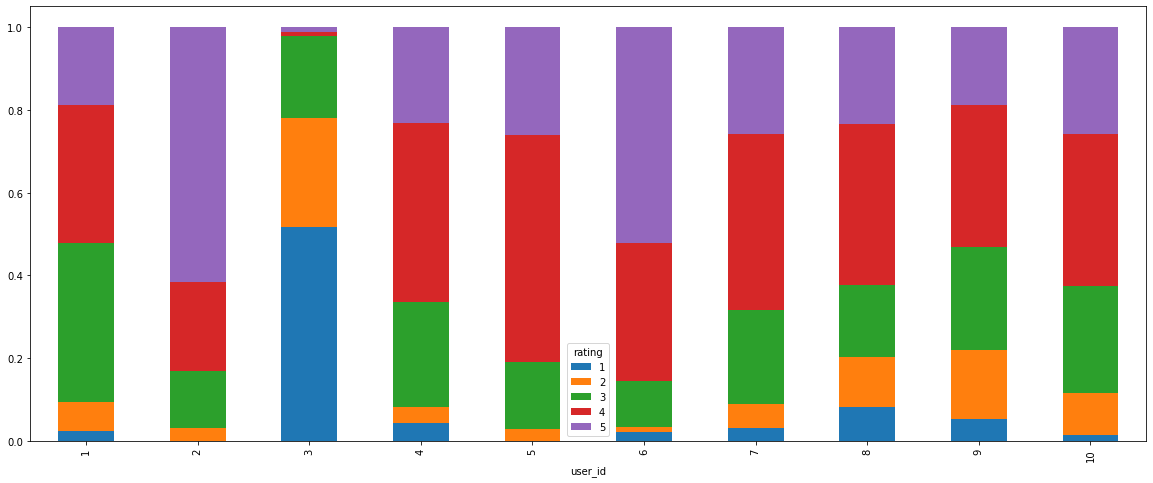

In [21]:
crosstab_01 = pd.crosstab(df['user_id'], df['rating'])

crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind = 'bar', stacked = True, figsize = (20, 8))

### ✅ Heatmap plot shows the correlation between book dataset columns

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
همانطور که در نمودار heatmap زیر مشخص است متغیر هایی که به rating مربوط هستند همبستگی قوی باهم دارند همچنین id های مختلف کتاب ها نیز مرتبط با یکدیگر هستند.

In [22]:
book = pd.read_csv(path + 'book_no_null.csv')

<AxesSubplot:>

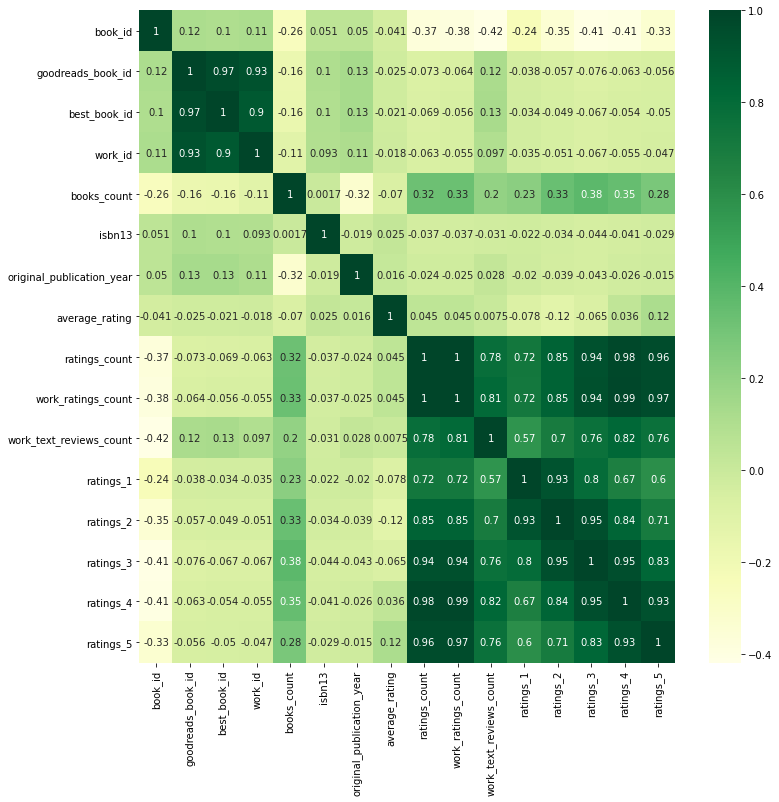

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(12,12))

sns.heatmap(book.corr(), annot = True, fmt='.2g',cmap= 'YlGn')

### ✅ Ratings distribution

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
در این قسمت توزیع امتیازات بررسی شده است با توجه به نمودار ستونی زیر مشخص است که امتیازات 4 و 5 نسبت به امتیازات 1 و 2 و 3 فراوانی بیشتری داشته اند. این نتیجه یک مورد را در ذهن تداعی می کند. شاید کابران سیستم خوشبینانه امتیاز می دهند و لذا بنابر این نتیجه به نظر میرسد اگر پیش بینی کنیم کاربری امتیاز 4 و 5 به کتابی میدهد آن کتاب پیشنهاد خوبی خواهد بود.

<AxesSubplot:xlabel='rating', ylabel='count'>

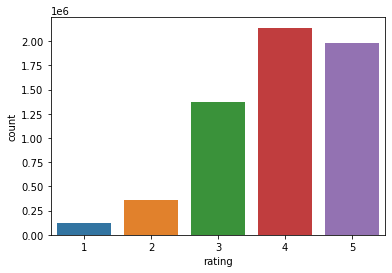

In [56]:
sns.countplot(rating['rating'])

### ✅ Average_rating of books has a semi normal distribution

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
نمودار هیستوگرام مربوط به متوسط امتیازات کتاب ها رسم شده است و به نظر میرسد دارای یک توزیع نسبتا نرمال است و لذا توزیع میانگین امتیازات معقول به نظر میرسد چرا که هم کتاب هایی با میانگین امتیاز پایین و هم کتاب هایی با میانگین امتیاز بالا درون دیتاست موجود است.

<AxesSubplot:ylabel='Frequency'>

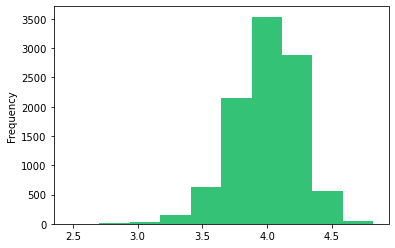

In [64]:
book['average_rating'].plot(kind = 'hist', stacked = True, color='#34c276')

### ✅ Books' language distribution

In [26]:
book.language_code.value_counts()

eng      7408
en-US    2072
en-GB     257
ara        64
en-CA      58
fre        29
ind        21
spa        20
ger        15
jpn         9
per         7
pol         6
por         6
en          4
dan         3
nor         3
tur         2
fil         2
ita         2
swe         2
hin         2
fin         1
nl          1
rus         1
es-ar       1
rum         1
vie         1
mul         1
chi         1
Name: language_code, dtype: int64

### ✅ Merging rare language_code

In [27]:
for i in book[~book['language_code'].isna()].language_code.unique():
    if (book.language_code.value_counts()[i] < 10):
        book['language_code'].replace({i:'other'}, inplace=True)

In [36]:
print('The number of each language in book dataset')
book.language_code.value_counts()

The number of each language in book dataset


eng      7408
en-US    2072
en-GB     257
ara        64
en-CA      58
other      56
fre        29
ind        21
spa        20
ger        15
Name: language_code, dtype: int64

In [35]:
print('The proportion of each language in book dataset')
(book.language_code.value_counts() / len(book)) * 100

The proportion of each language in book dataset


eng      74.08
en-US    20.72
en-GB     2.57
ara       0.64
en-CA     0.58
other     0.56
fre       0.29
ind       0.21
spa       0.20
ger       0.15
Name: language_code, dtype: float64

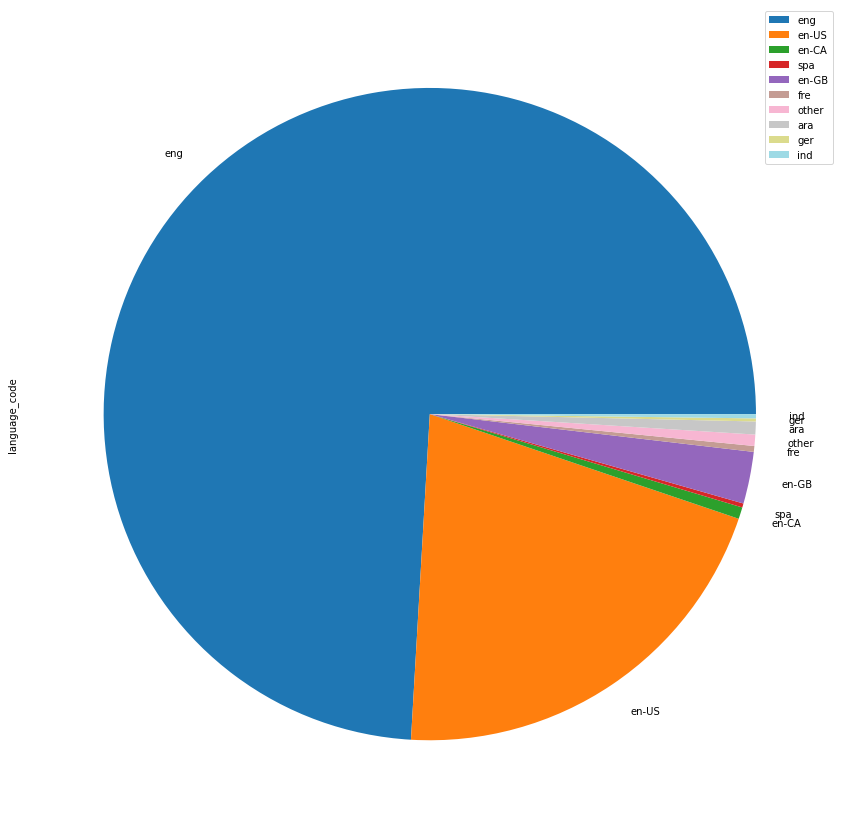

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(book.language_code.value_counts(),index=list(book.language_code.unique()),columns=['language_code'])
plot = df.plot.pie(y='language_code', figsize=(15, 15), cmap = 'tab20')
plt.legend(loc='upper right')